In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 

In [2]:
class parton():
    def __init__(self, pt, eta, phi, mass):
        self.pt = pt 
        self.eta = eta
        self.phi = phi
        self.mass = mass

class jet():
    def __init__(self, pt, eta, phi, mass):
        self.pt = pt 
        self.eta = eta
        self.phi = phi
        self.mass = mass

In [3]:
with h5py.File("event_record_chi2_normal.h5", 'r') as f:
    parton_normal = parton(f['parton_pt'][:], f['parton_eta'][:], f['parton_phi'][:], f['parton_mass'][:])
    jet_normal = jet(f['jet_pt'][:], f['jet_eta'][:], f['jet_phi'][:], f['jet_mass'][:])
    jet_parton_index_normal = f['jet_parton_index'][:]
    parton_jet_index_normal = f['parton_jet_index'][:]
    
with h5py.File("event_record_chi2_mtop.h5", 'r') as g:
    parton_mtop = parton(g['parton_pt'][:], g['parton_eta'][:], g['parton_phi'][:], g['parton_mass'][:])   
    jet_mtop = jet(g['jet_pt'][:], g['jet_eta'][:], g['jet_phi'][:], g['jet_mass'][:])
    jet_parton_index_mtop = g['jet_parton_index'][:]
    parton_jet_index_mtop = g['parton_jet_index'][:]

In [4]:
class jet_cand_properties_normal():
    def __init__(self, idx_1, idx_2):
        self.idx_1 = idx_1
        self.idx_2 = idx_2
        self.pt = jet_normal.pt[self.idx_1][self.idx_2]
        self.eta = jet_normal.eta[self.idx_1][self.idx_2]
        self.phi = jet_normal.phi[self.idx_1][self.idx_2]
        self.mass = jet_normal.mass[self.idx_1][self.idx_2]
        # scale = -0.0008228230613626063 * self.pt - 0.051359995969670155
        # scale = 1 - (scale/2)
        scale = 1

        tmp_px = self.pt*np.cos(self.phi)
        tmp_py = self.pt*np.sin(self.phi)
        tmp_pz = self.pt*np.sinh(self.eta)

        self.px = tmp_px*scale
        self.py = tmp_py*scale
        self.pz = tmp_pz*scale
        self.e = np.sqrt( (self.px**2 + self.py**2 + self.pz**2) + self.mass**2 )
        
class jet_cand_properties_mtop():
    def __init__(self, idx_1, idx_2):
        self.idx_1 = idx_1
        self.idx_2 = idx_2
        self.pt = jet_mtop.pt[self.idx_1][self.idx_2]
        self.eta = jet_mtop.eta[self.idx_1][self.idx_2]
        self.phi = jet_mtop.phi[self.idx_1][self.idx_2]
        self.mass = jet_mtop.mass[self.idx_1][self.idx_2]
        # scale = -0.0008228230613626063 * self.pt - 0.051359995969670155
        # scale = 1 - (scale/2)
        scale = 1

        tmp_px = self.pt*np.cos(self.phi)
        tmp_py = self.pt*np.sin(self.phi)
        tmp_pz = self.pt*np.sinh(self.eta)

        self.px = tmp_px*scale
        self.py = tmp_py*scale
        self.pz = tmp_pz*scale
        self.e = np.sqrt( (self.px**2 + self.py**2 + self.pz**2) + self.mass**2 )
        
def cal_two_parton_inv(jet1, jet2):
        part_1 = (jet1.e + jet2.e)**2
        part_2 = (jet1.px + jet2.px)**2
        part_3 = (jet1.py + jet2.py)**2
        part_4 = (jet1.pz + jet2.pz)**2
        return np.sqrt( part_1 - part_2 - part_3 - part_4 )

def cal_three_parton_inv(jet1, jet2, jet3):
    part_1 = (jet1.e + jet2.e + jet3.e)**2
    part_2 = (jet1.px + jet2.px + jet3.px)**2
    part_3 = (jet1.py + jet2.py + jet3.py)**2
    part_4 = (jet1.pz + jet2.pz + jet3.pz)**2
    return np.sqrt( part_1 - part_2 - part_3 - part_4 )

top_inv_normal = []
tbar_inv_normal = []
W_plus_inv_normal = []
W_minus_inv_normal = []
for i in range(len(jet_parton_index_normal)):
    for j in range(len(jet_parton_index_normal[i])):
        if jet_parton_index_normal[i][j] == 0:
            bjet_1 = jet_cand_properties_normal(i,j)
        elif jet_parton_index_normal[i][j] == 1:
            jet_1 = jet_cand_properties_normal(i,j)
        elif jet_parton_index_normal[i][j] == 2:
            jet_2 = jet_cand_properties_normal(i,j)
        elif jet_parton_index_normal[i][j] == 3:
            bjet_2 = jet_cand_properties_normal(i,j)
        elif jet_parton_index_normal[i][j] == 4:
            jet_3 = jet_cand_properties_normal(i,j)
        elif jet_parton_index_normal[i][j] == 5:
            jet_4 = jet_cand_properties_normal(i,j)
        else : pass
        
    top_inv_normal.append(cal_three_parton_inv(bjet_1, jet_1, jet_2))
    tbar_inv_normal.append(cal_three_parton_inv(bjet_2, jet_3, jet_4))
    W_plus_inv_normal.append(cal_two_parton_inv(jet_1, jet_2))
    W_minus_inv_normal.append(cal_two_parton_inv(jet_3, jet_4))

top_inv_mtop = []
tbar_inv_mtop = []
W_plus_inv_mtop = []
W_minus_inv_mtop = []
for i in range(len(jet_parton_index_mtop)):
    for j in range(len(jet_parton_index_mtop[i])):
        if jet_parton_index_mtop[i][j] == 0:
            bjet_1 = jet_cand_properties_mtop(i,j)
        elif jet_parton_index_mtop[i][j] == 1:
            jet_1 = jet_cand_properties_mtop(i,j)
        elif jet_parton_index_mtop[i][j] == 2:
            jet_2 = jet_cand_properties_mtop(i,j)
        elif jet_parton_index_mtop[i][j] == 3:
            bjet_2 = jet_cand_properties_mtop(i,j)
        elif jet_parton_index_mtop[i][j] == 4:
            jet_3 = jet_cand_properties_mtop(i,j)
        elif jet_parton_index_mtop[i][j] == 5:
            jet_4 = jet_cand_properties_mtop(i,j)
        else : pass
        
    top_inv_mtop.append(cal_three_parton_inv(bjet_1, jet_1, jet_2))
    tbar_inv_mtop.append(cal_three_parton_inv(bjet_2, jet_3, jet_4))
    W_plus_inv_mtop.append(cal_two_parton_inv(jet_1, jet_2))
    W_minus_inv_mtop.append(cal_two_parton_inv(jet_3, jet_4))

In [44]:
def plot_fn(line_1, line_2, line_3, line_4):
    plt.figure(figsize=(10,8))
    plt.hist(line_1, range=(0, 210), bins=70, label='Invariant mass of reconstructed top.', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.hist(line_2, range=(0, 210), bins=70, label='Invariant mass of reconstructed anti-top.', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.hist(line_3, range=(0, 210), bins=105, label='Invariant mass of reconstructed W+ boson.', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.hist(line_4, range=(0, 210), bins=105, label='Invariant mass of reconstructed W- boson.', histtype="stepfilled", stacked=True, alpha=0.5)
    plt.legend(loc='upper right')
    plt.xlabel("Invariant mass(GeV)")
    plt.ylabel("NUmber of events.")
    plt.title(r'Invariant mass distribution of $\chi{2}$ reconstruction')

## $\chi^{2}$ distribution using origin $\chi^{2}$ equation.

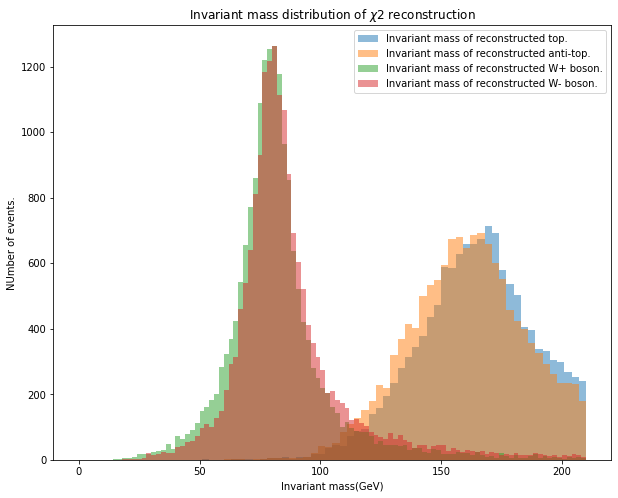

In [45]:
plot_fn(top_inv_normal, tbar_inv_normal, W_plus_inv_normal, W_minus_inv_normal)

In [47]:
## $\chi^{2}$ distribution using m_{top} $\chi^{2}$ equation.

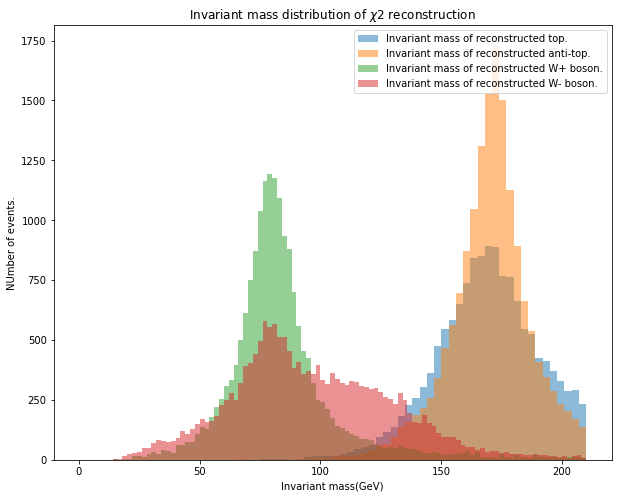

In [46]:
plot_fn(top_inv_mtop, tbar_inv_mtop, W_plus_inv_mtop, W_minus_inv_mtop)